In [72]:
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('mtcars.csv')
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [15]:
df.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [16]:
print('데이터의 갯수 : ',df.shape[0])

데이터의 갯수 :  32


In [17]:
df.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [18]:
df = df.rename(columns = {'Unnamed: 0' : 'cname'})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cname   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [20]:
df.dtypes

cname     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

In [21]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


### gear, transmission features 값 

In [22]:
df['gear'].value_counts()

gear
3    15
4    12
5     5
Name: count, dtype: int64

In [23]:
df['am'].value_counts()

am
0    19
1    13
Name: count, dtype: int64

### pandas crosstab 사용하여 조합 찾기

In [57]:
result_crosstab = pd.crosstab(index = df['gear'],columns = df['am'])
print(result_crosstab)

am     0  1
gear       
3     15  0
4      4  8
5      0  5


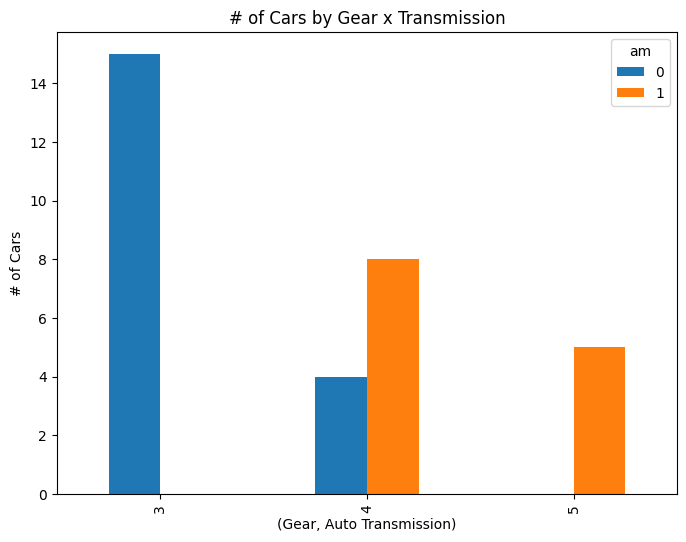

In [58]:
result_crosstab.plot(kind='bar', figsize=(8,6))

plt.title('# of Cars by Gear x Transmission')
plt.xlabel('(Gear, Auto Transmission)')
plt.ylabel('# of Cars')
plt.show()

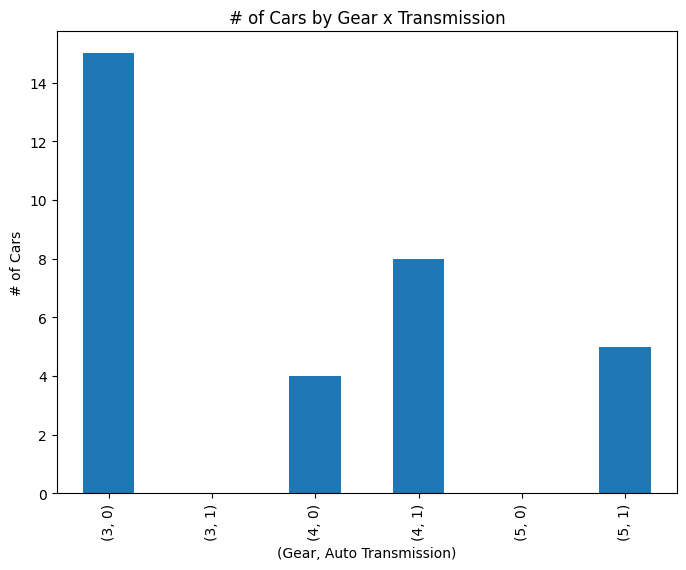

In [59]:
result_crosstab.stack().plot(kind='bar', figsize=(8,6))

plt.title('# of Cars by Gear x Transmission')
plt.xlabel('(Gear, Auto Transmission)')
plt.ylabel('# of Cars')
plt.show()

### pandas.crosstab을 사용하지 않고 조합 알아내기

1. pivot table은 데이터를 원하는 형태로 집계할 때 유용하게 사용할 수 있는 방법
2. groupby 기능을 사용하는 방법 

In [26]:
result_pivot = df.pivot_table(index = 'gear',columns = 'am', aggfunc='size', fill_value = 0)
print(result_pivot)

am     0  1
gear       
3     15  0
4      4  8
5      0  5


In [64]:
# 바로 멀티 인덱스 형태로 나타남
result_groupby = df.groupby(['gear','am']).size()
print(result_groupby)

gear  am
3     0     15
4     0      4
      1      8
5     1      5
dtype: int64


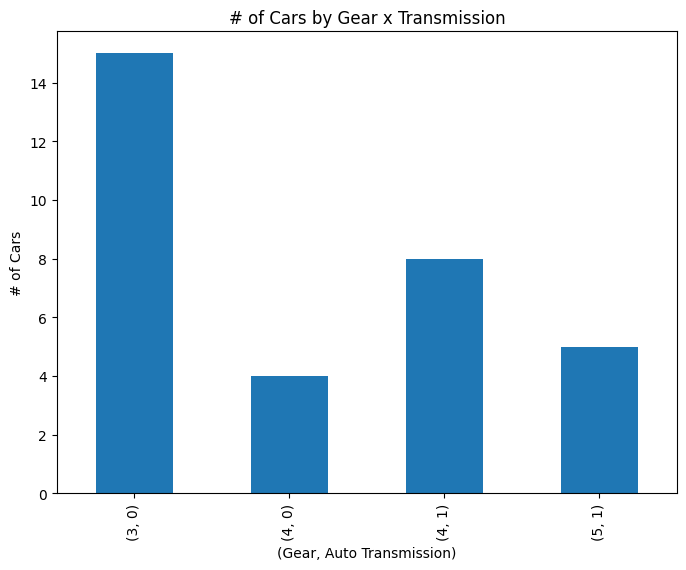

In [65]:
result_groupby.plot(kind='bar', figsize=(8,6))

plt.title('# of Cars by Gear x Transmission')
plt.xlabel('(Gear, Auto Transmission)')
plt.ylabel('# of Cars')
plt.show()

### 모든 feature의 히스토그램 그리기

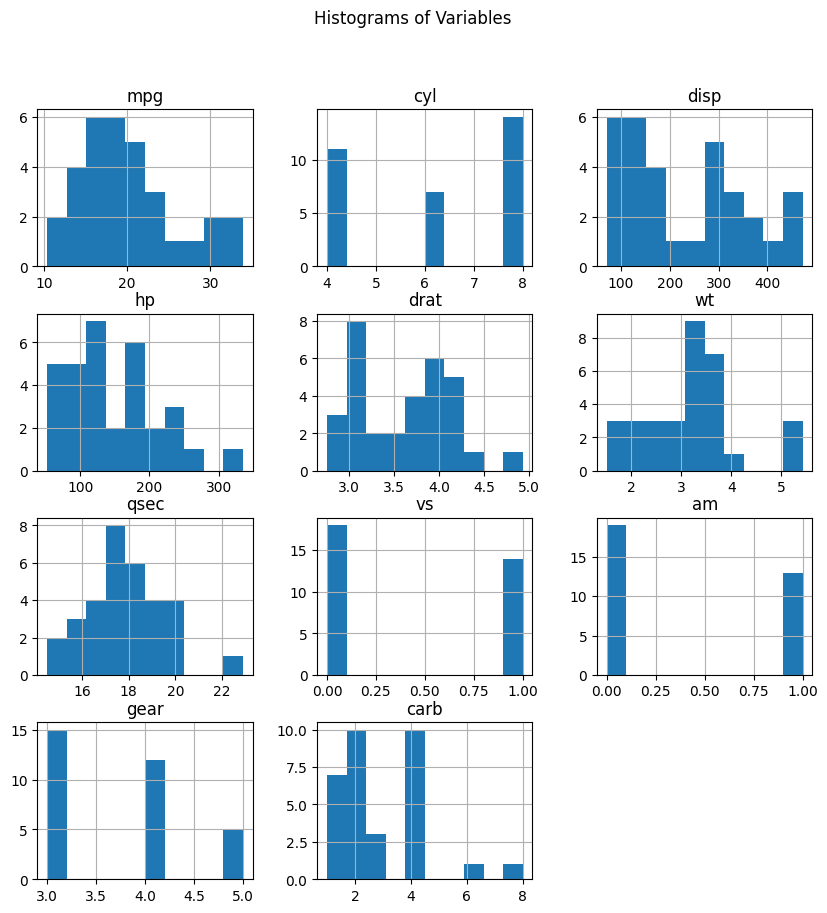

In [28]:
df.hist(figsize=(10, 10))
plt.suptitle('Histograms of Variables')
plt.show()

### Cylinder와 HorsePower간의 상관관계

cylinder의 개수가 4개일 경우 마력은 약50 ~ 120, 개수가 6개 일때는 마력이 약100 ~ 180, 개수가 8일때는 마력이 약150 ~ 330까지 범위가 분포되는 것을 확인할 수 있다.

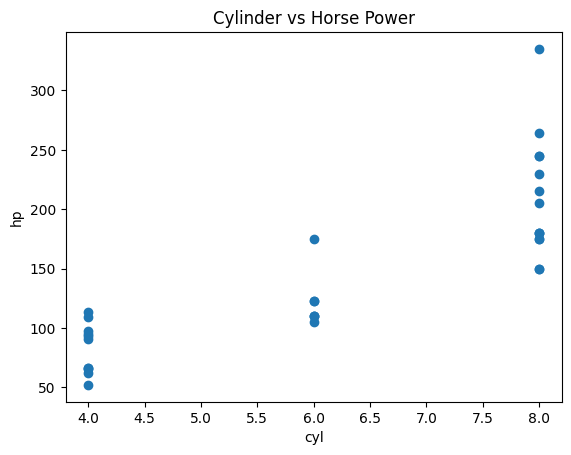

In [29]:
plt.scatter(df['cyl'],df['hp'])
plt.title("Cylinder vs Horse Power")
plt.xlabel("cyl")
plt.ylabel("hp")
plt.show()

### MPG와 HorsePower간의 상관관계

아래의 scatter표를 확인해보면 마력이 클수록 mpg(갤런당 mile)가 작은 것을 확인할 수 있다. 

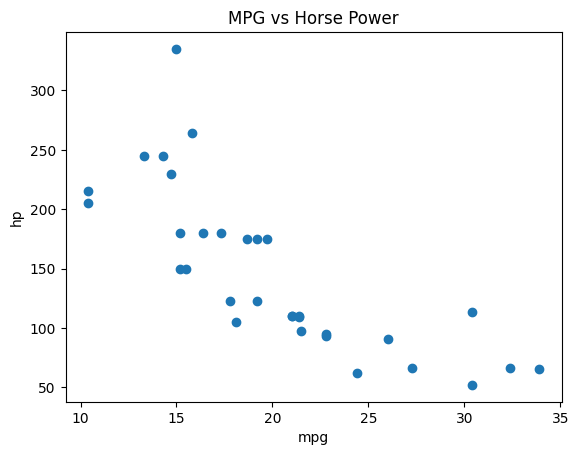

In [30]:
plt.scatter(df['mpg'],df['hp'])
plt.title("MPG vs Horse Power")
plt.xlabel("mpg")
plt.ylabel("hp")
plt.show()

### 상관계수를 구하는 표 출력

상관계수 : 두 변수간의 연관된 정도를 나타냄, 상관 계수 값의 범위는 -1부터 1까지이다. 계수의 절대값이 클수록 변수 사이에 강한 관계가 있다. Pearson 상관의 경우 절댓값 1은 완전한 선형 관계를 나타내고, 0에 가까운 상관 값은 변수 사이에 선형 관계가 없음을 나타낸다.

범주형 데이터 :
- 명목형 : 범주간에 순서가 없는 데이터. 예를 들어, 색, 동물의 종류, 지역 이름. 
- 순서형 : 범주간에 순서가 있는 데이터. 예를 들어 순위, 학력 수준(고졸, 대졸, 석사, 박사)

연속형 데이터 : 수치적이며 무한한 값을 가짐. 연속적인 스케일을 가지며 측정 가능한 정밀도. 나이, 키, 온도, 판매량, 수익 등이 연속형 자료형. 

피어슨 상관계수를 이용하여 두 변수의 상관계수 파악하기
- 피어슨 상관계수 : 두 변수 간의 선형 상관관계를 -1에서 +1 사이의 숫자로 표현한 것
- +1에 가까울 수록 강한 양의 상관 관계 ex) 운동시간 증가 -> 칼로리 소모 증가
- 0에 가까울 수록 상관 관계가 거의 없음
- -1에 가까울 수록 강한 음의 상관 관계 ex) 가격 인상 -> 구매량 감소

보통 변수들이 연속 변수이고 정규 분포를 따르는 데이터에 적용된다.

In [47]:
df.iloc[:,1:].corr(method='pearson')

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


켄달-타우 상관계수를 이용하여 두 변수의 상관계수 파악하기 
- 켄달-타우 상관계수 : 두 변수들간의 순위를 비교해서 연관성을 계산하는 방식
- 정규분포를 가정할 수 없을 때 사용

세상 모든 변수가 연속형 변수는 아니다. 답이 범위형 혹은 객관식으로 답을 했다면 연속형 변수가 아닌 순위형 변수가 된다. 이때는 스피어만 혹은 켄달 타우를 사용해야 하는데, 스피어만의 경우 동일 순위를 갖는 경우가 없다고 가정한다. 따라서 동일 순위가 있거나, 표본의 수가 적을 때 켄달 타우 상관계수를 사용하는 것이 적합하다.

In [53]:
result_kendall = df.iloc[:,1:].corr(method='kendall')
df.iloc[:,1:].corr(method='kendall')

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.795313,-0.768131,-0.742813,0.464549,-0.727832,0.315365,0.589679,0.469013,0.433151,-0.504395
cyl,-0.795313,1.000000,0.814426,0.785186,-0.551318,0.728261,-0.448970,-0.771001,-0.494621,-0.512543,0.465430
disp,-0.768131,0.814426,1.000000,0.665999,-0.498983,0.743382,-0.300815,-0.603306,-0.520274,-0.475980,0.413736
hp,-0.742813,0.785186,0.665999,1.000000,-0.382627,0.611308,-0.472906,-0.630593,-0.303996,-0.279446,0.595984
drat,0.464549,-0.551318,-0.498983,-0.382627,1.000000,-0.547150,0.032722,0.375101,0.575548,0.583925,-0.095352
wt,-0.727832,0.728261,0.743382,0.611308,-0.547150,1.000000,-0.141988,-0.488479,-0.613879,-0.543596,0.371374
qsec,0.315365,-0.448970,-0.300815,-0.472906,0.032722,-0.141988,1.000000,0.657543,-0.168904,-0.091261,-0.506439
vs,0.589679,-0.771001,-0.603306,-0.630593,0.375101,-0.488479,0.657543,1.000000,0.168345,0.269748,-0.576927
am,0.469013,-0.494621,-0.520274,-0.303996,0.575548,-0.613879,-0.168904,0.168345,1.000000,0.770788,-0.058599
gear,0.433151,-0.512543,-0.475980,-0.279446,0.583925,-0.543596,-0.091261,0.269748,0.770788,1.000000,0.098015


스피어먼 상관계수를 이용하여 두 변수의 상관계수 파악하기
- 스피어먼 상관계수 : 값에 순위를 매겨 그 순위에 대해 상관계수를 구하는 방법.
- 스피어만은 데이터 내 편차와 에러에 민감하여 일반적으로 켄달 상관계수보다 높은 값 가짐.
- 정규분포를 가정할 수 없을 때 사용

위에서 언급한 것 처럼 세상 모든 변수가 연속형 변수는 아니다. 스피어만은 동일 순위를 갖는 경우가 없다고 가정한다. 이로 인해 동일 순위가 없는 경우 사용할 때 적합하다. 

In [41]:
df.iloc[:,1:].corr(method='spearman')

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.910801,-0.908882,-0.894665,0.651455,-0.886422,0.466936,0.706597,0.562006,0.542782,-0.657498
cyl,-0.910801,1.000000,0.927652,0.901791,-0.678881,0.857728,-0.572351,-0.813789,-0.522071,-0.564310,0.580068
disp,-0.908882,0.927652,1.000000,0.851043,-0.683592,0.897706,-0.459782,-0.723664,-0.624068,-0.594470,0.539778
hp,-0.894665,0.901791,0.851043,1.000000,-0.520125,0.774677,-0.666606,-0.751593,-0.362328,-0.331402,0.733379
drat,0.651455,-0.678881,-0.683592,-0.520125,1.000000,-0.750390,0.091869,0.447457,0.686571,0.744816,-0.125223
wt,-0.886422,0.857728,0.897706,0.774677,-0.750390,1.000000,-0.225401,-0.587016,-0.737713,-0.676128,0.499812
qsec,0.466936,-0.572351,-0.459782,-0.666606,0.091869,-0.225401,1.000000,0.791571,-0.203332,-0.148200,-0.658718
vs,0.706597,-0.813789,-0.723664,-0.751593,0.447457,-0.587016,0.791571,1.000000,0.168345,0.282662,-0.633695
am,0.562006,-0.522071,-0.624068,-0.362328,0.686571,-0.737713,-0.203332,0.168345,1.000000,0.807688,-0.064365
gear,0.542782,-0.564310,-0.594470,-0.331402,0.744816,-0.676128,-0.148200,0.282662,0.807688,1.000000,0.114887


==> 해당 데이터셋은 데이터의 개수가 32개여서 크기가 상당히 작은 데이터고, 정규분포를 따르지 않는 것 같다. 또 작은 데이터 셋이고, 중복되는 데이터를 갖는 경우가 많기 때문에 켄달 순위 상관계수를 사용하는 것이 적합하다고 생각한다.

### 팀 활동 요구사항

drat(Real Axle ratio) : 구동축이 바퀴를 회전시키기 위해 드라이브 샤프트가 몇 번 회전해야 하는지. 뒷 바퀴 축의 기어비. 높은 기어비 : 더 빠른 가속, 연비를 악화시키지만, 중량 견인에 적합, 높은 기어비는 견인 능력을 향상시킨다. 

##### 이런 데이터셋을 분석해서 얻을 수 있는 경제적 가치는 무엇일까요? 어떤 비즈니스 상황에서 이런 데이터셋을 분석해서 어떤 경제적 가치를 얻을 수 있을까요?
- 차량을 구매하려는 사람에게 추천 서비스를 제공할 수 있다. 예를 들어, 연비를 중요시하는 사용자라면, 배기량 혹은 실린더의 수가 작은 차종을 선택하도록 추천을 해주고, 크고 무거운 물건들을 운송해야 하거나, 차가 잘 나가거나, 빠른 출력을 원하는 사용자라면 실린더의 수가 많고, 배기량이 큰 차종을 추천해준다. 이를 통해 고객의 이해를 도와 제품 접근성이 높을 수 있을 것이다. 
- 차량의 설계 부분에서도 사용할 수 있다. 예를 들어, 경제적 혹은 물리적 제약으로 인해 차량의 크기가 작거나, 엔진룸의 크기가 작은 차종일 경우 부피가 작은 엔진을 배치해야할 때, 같은 배기량을 달성하기 위해 작은 실린더를 여러개 사용하도록 설계할 수 있을 것이다. 이로 인해 엔진룸의 부피를 감소시킬 수 있을 것이다. 이와 같이 다음과 같은 상관관계 분석을 통해 자동차 설계 면에서도 비용을 효율적으로 활용할 수 있다.
- 상관관계를 통해서 인과관계를 파악하는데 시간적, 경제적 절약이 이뤄질 수 있고, 여러 기업들의 특장점 파악에 효율적으로 사용할 수 있다.
- 기초 통계량 혹은 상관관계를 이용해서 품질 서비스 관리 측면에서도 활용할 수 있다. 예를 들어 통계상의 특이값 혹은 오류값이 발견된다면 이를 바탕으로 어떤 것으로 인해 문제가 발생하는지 파악해 서비스를 개선하고 제공할 수 있다.

##### 변수들 간의 상관 관계가 높은 조합을 임의로 2개 선택해서 해당 데이터 간의 상관 관계를 그래프로 그리고 어떤 결론을 내릴 수 있는지를 토의하세요.
1. (disp, cyl) : 배기량(disp), 실린더의 수(cyl)
   - 그래프의 양의 상관관계가 크다.
   - 배기량은 엔진 내에 있는 피스톤들의 왕복운동이 만드는 전체 공간의 부피.
   - 배기량 = 실린더 단면적 x 개수 x 움직이는 길이
   - 즉, 동일한 실린더라면 개수가 많을 수록 배기량이 커지게 된다.
2. (mpg, cyl) : 연비(mpg), 실린더의 수(cyl)
   - 그래프의 음의 상관관계가 크다.
   - 실린더의 수가 많다는 것은 배기량이 높다는 것을 의미하고, 한 번에 더 많은 연료를 소비해서 높은 출력을 낼 수 있다는 것을 의미한다. 이로인해 똑같은 운전 습관으로 운전한다 가정할 떄 같은 마일을 가더라도, 실린더 수가 많을수록 연료를 많이 사용해 연비가 낮아지게 된다.

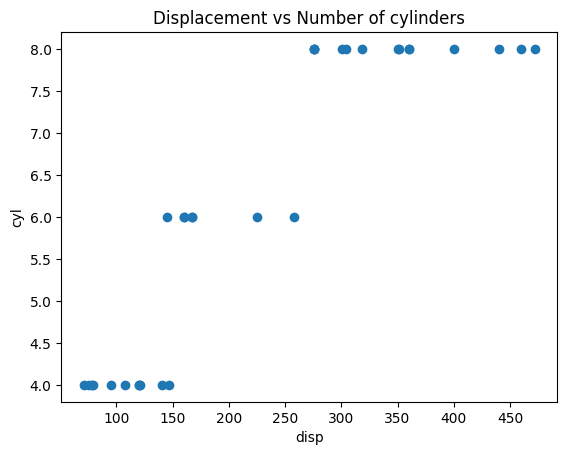

<Axes: xlabel='disp', ylabel='cyl'>

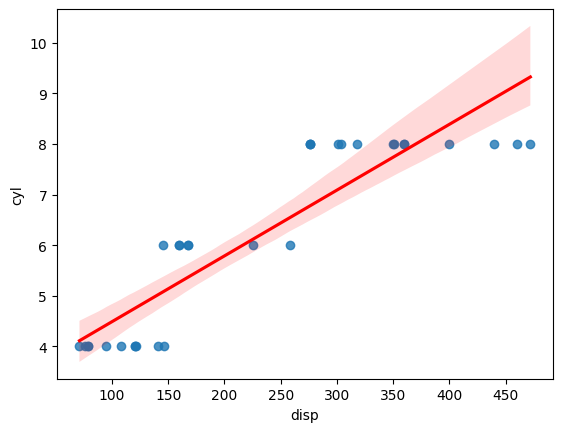

In [82]:
import seaborn as sns

plt.scatter(df['disp'],df['cyl'])
plt.title("Displacement vs Number of cylinders")
plt.xlabel("disp")
plt.ylabel("cyl")
plt.show()

# 추세선
sns.regplot(x='disp',y='cyl',data=df,line_kws={'color': 'red'})

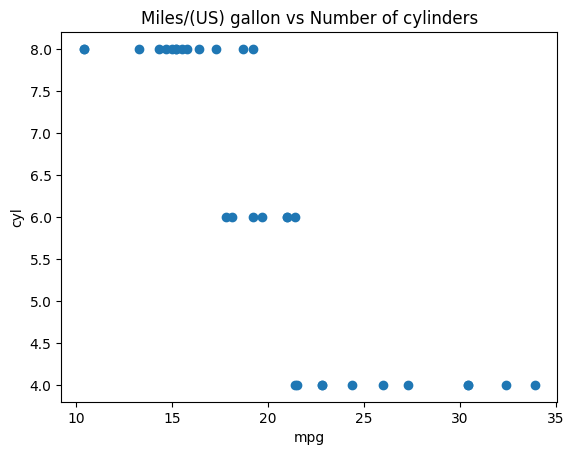

<Axes: xlabel='mpg', ylabel='cyl'>

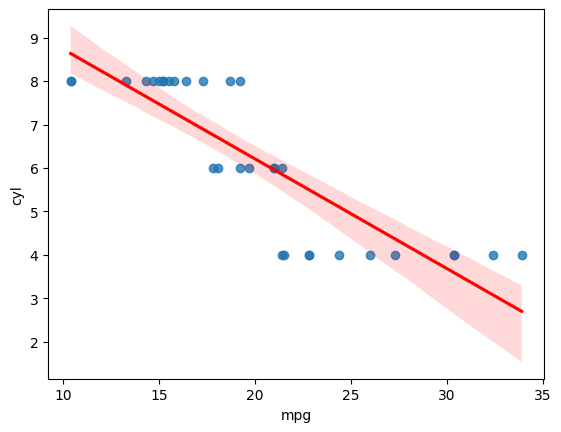

In [83]:
plt.scatter(df['mpg'],df['cyl'])
plt.title("Miles/(US) gallon vs Number of cylinders")
plt.xlabel("mpg")
plt.ylabel("cyl")
plt.show()

# 추세선
sns.regplot(x='mpg',y='cyl',data=df,line_kws={'color': 'red'})